In [3]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 35.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=84ceb68deed41873e10a29d64007f5cc0a88503b69928729495aad32cd464fc2
  Stored in directory: /home/niemih9/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


In [29]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import zipfile

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [30]:
# Path for saving the dataset
EARTHQUAKE_PATH = os.path.join("datasets", "earthquake")
ZIP_FILE_PATH = os.path.join(EARTHQUAKE_PATH, "earthquake-dataset.zip")

if not os.path.isdir(EARTHQUAKE_PATH):
    os.makedirs(EARTHQUAKE_PATH)

def fetch_earthquake_data(earthquake_path=EARTHQUAKE_PATH, zip_file_path=ZIP_FILE_PATH):
    os.system(f'kaggle datasets download -d warcoder/earthquake-dataset -p {earthquake_path}')

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(earthquake_path)
    
    return earthquake_path

# Fetch and unzip the dataset
dataset_path = fetch_earthquake_data()

# Load the CSV file
csv_file_path = os.path.join(dataset_path, "earthquake_data.csv")
earthquakes = pd.read_csv(csv_file_path)

# Display first few rows of the dataset
earthquakes.head()

Dataset URL: https://www.kaggle.com/datasets/warcoder/earthquake-dataset
License(s): CC0-1.0
earthquake-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [31]:
# Cleaning the dataset

In [32]:
# Keep only necessary columns
columns_to_keep = ['magnitude', 'mmi', 'depth', 'latitude', 'longitude', 'tsunami']
earthquakes = earthquakes[columns_to_keep]

In [33]:
# Display first few rows of cleaned dataset
earthquakes.head()

,magnitude,mmi,depth,latitude,longitude,tsunami
0,7.0,7,14.000,-9.7963,159.596,1
1,6.9,4,25.000,-4.9559,100.738,0
2,7.0,3,579.000,-20.0508,-178.346,1
3,7.3,5,37.000,-19.2918,-172.129,1
4,6.6,2,624.464,-25.5948,178.278,1


In [34]:
# Check dataset size
print(f"Dataset size: {earthquakes.shape}")

Dataset size: (782, 6)


In [35]:
#Show summary of the dataset
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   mmi        782 non-null    int64  
 2   depth      782 non-null    float64
 3   latitude   782 non-null    float64
 4   longitude  782 non-null    float64
 5   tsunami    782 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 36.8 KB


In [36]:
# Statistics summary
earthquakes.describe()

,magnitude,mmi,depth,latitude,longitude,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,5.964194,75.883199,3.538100,52.609199,0.388747
std,0.445514,1.462724,137.277078,27.303429,117.898886,0.487778
min,6.500000,1.000000,2.700000,-61.848400,-179.968000,0.000000
25%,6.600000,5.000000,14.000000,-14.595600,-71.668050,0.000000
50%,6.800000,6.000000,26.295000,-2.572500,109.426000,0.000000
75%,7.100000,7.000000,49.750000,24.654500,148.941000,1.000000
max,9.100000,9.000000,670.810000,71.631200,179.662000,1.000000


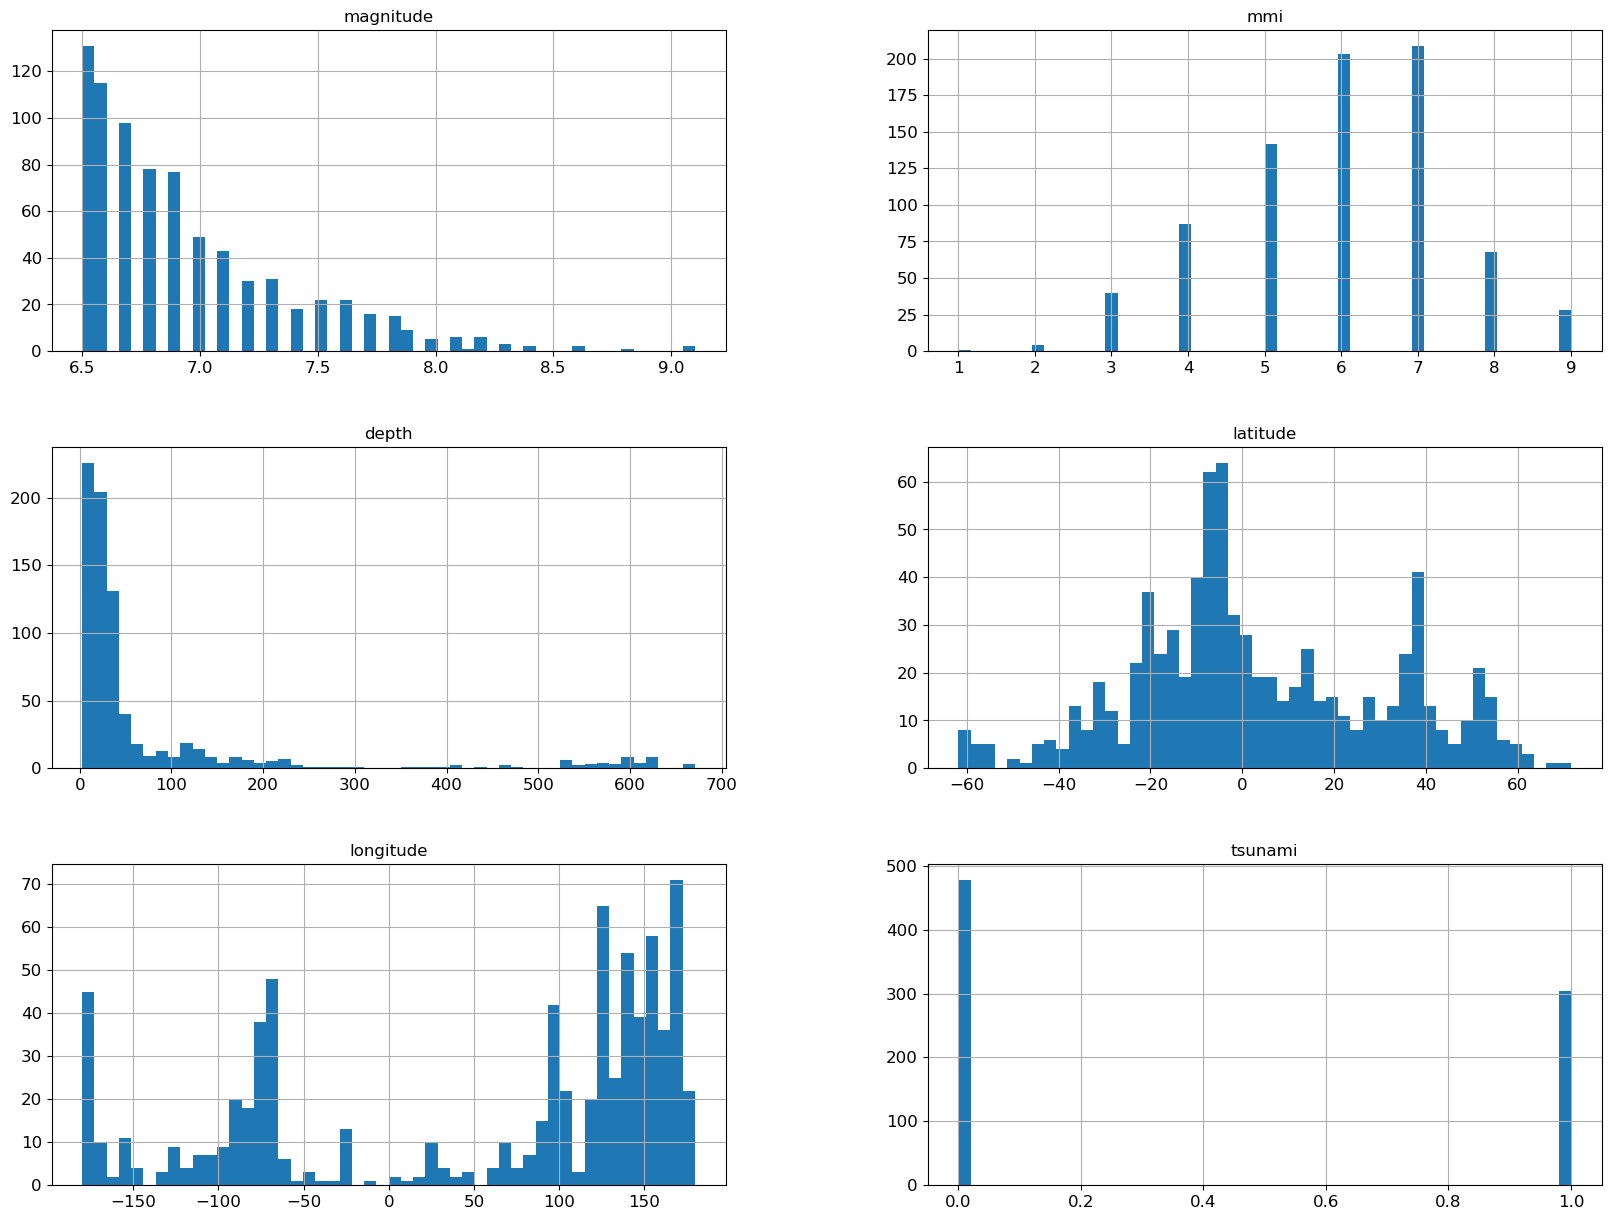

In [37]:
# Histograms
earthquakes.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
#visualization

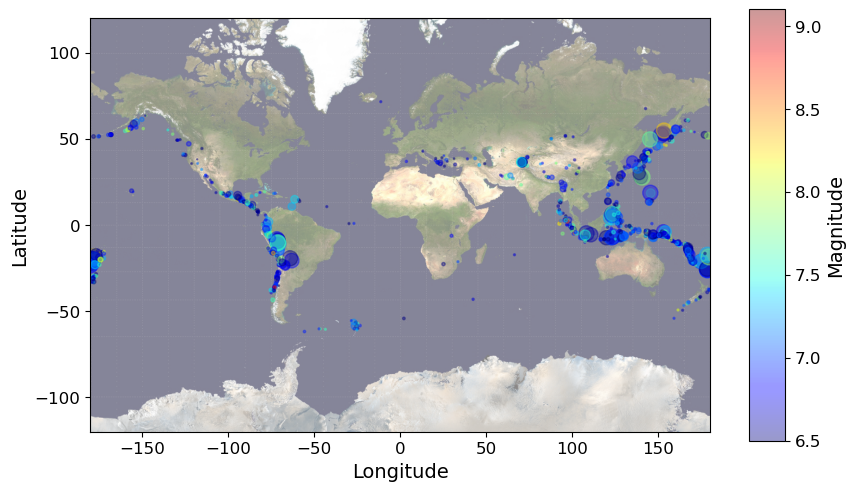

In [118]:
import urllib.request

# Image URL
world_map_url = "https://upload.wikimedia.org/wikipedia/commons/7/74/Mercator-projection.jpg"
filename = "mermap.jpg" 
print("Downloading", filename)
urllib.request.urlretrieve(world_map_url, os.path.join(images_path, filename))

# Read the image
world_map_img = mpimg.imread(os.path.join(images_path, filename))

# Create a scatter plot on top of the world map
ax = earthquakes.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.4,
                      s=earthquakes["depth"] / 5, c=earthquakes["magnitude"],
                      cmap='jet', colorbar=False)

# Overlay the world map image
plt.imshow(world_map_img, extent=[-180, 180, -120, 120], alpha=0.5)

# Set labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Add color bar
cbar = plt.colorbar(ax.collections[0], label='Magnitude', aspect=12, shrink=0.8)